In [1]:
# Sentiment Analysis on IMDB movie reviews to figure out if a comment is positive or negative
# Deep learning algorithm to predict the number of positive or negative
# Training Accuracy should not be less than 87% 
# Difference between training and test accuracy should not exceed 2.5%
# Can plot the learning curve check if model is overfitted (optional)

# Dataset https://ai.stanford.edu/~amaas/data/sentiment/
# Above provides a set of 25,000 highly popular movie reviews for training and 25,000 for testing

In [2]:
# pip install tensorflow

In [3]:
import tensorflow as tf # Import Tensorflow
import numpy as np # Import NumPy
import pandas as pd # Import Pandas
import matplotlib.pyplot as plt # Matplotlib Data Visualization Library
import seaborn as sns # Seaborn Data Visualization Library
import os  # OS module provides functions for interacting with the operating system

from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

In [4]:
# Dictionary where each review and sentiment is stored
data_dict = {'Review': [], 'Sentiment': []} 

In [5]:
# Path of directory containing the positive reviews for the training set
positive_train_dir = './aclImdb/train/pos/'
# List of all the review txt filenames inside the directory
positive_train_files = os.listdir(positive_train_dir)

# For each txt file in the directory...
for file in positive_train_files:
    # Create a file object by combining the directory and current file name 
    file_object = open(positive_train_dir + file, "r", encoding="utf8")
    # Read the file object and store the contents of the file in a variable called review_text
    review_text = file_object.read()
    # Append the review_text to the array in the 'Review' key in data_dict
    data_dict['Review'].append(review_text)
    # Append a 'Positive' string to the array in the 'Sentiment' key in data_dict
    data_dict['Sentiment'].append('Positive')
    
# Path of directory containing the negative reviews for the training set
negative_train_dir = './aclImdb/train/neg/'
# List of all the review txt filenames inside the directory
negative_train_files = os.listdir(negative_train_dir)

# For each txt file in the directory...
for file in negative_train_files:
    # Create a file object by combining the directory and current file name 
    file_object = open(negative_train_dir + file, "r", encoding="utf8")
    # Read the file object and store the contents of the file in a variable called review_text
    review_text = file_object.read()
    # Append the review_text to the array in the 'Review' key in data_dict
    data_dict['Review'].append(review_text)
    # Append a 'Negative' string to the array in the 'Sentiment' key in data_dict
    data_dict['Sentiment'].append('Negative')

In [6]:
# Path of directory containing the positive reviews for the testing set
positive_test_dir = './aclImdb/test/pos/'
# List of all the review txt filenames inside the directory
positive_test_files = os.listdir(positive_test_dir)

# For each txt file in the directory...
for file in positive_test_files:
    # Create a file object by combining the directory and current file name 
    file_object = open(positive_test_dir + file, "r", encoding="utf8")
    # Read the file object and store the contents of the file in a variable called review_text
    review_text = file_object.read()
    # Append the review_text to the array in the 'Review' key in data_dict
    data_dict['Review'].append(review_text)
    # Append a 'Positive' string to the array in the 'Sentiment' key in data_dict
    data_dict['Sentiment'].append('Positive')
    
# Path of directory containing the negative reviews for the testing set
negative_test_dir = './aclImdb/test/neg/'
# List of all the review txt filenames inside the directory
negative_test_files = os.listdir(negative_test_dir)

for file in negative_test_files:
    # Create a file object by combining the directory and current file name
    file_object = open(negative_test_dir + file, "r", encoding="utf8")
    # Read the file object and store the contents of the file in a variable called review_text
    review_text = file_object.read()
    # Append the review_text to the array in the 'Review' key in data_dict
    data_dict['Review'].append(review_text)
    # Append a 'Negative' string to the array in the 'Sentiment' key in data_dict
    data_dict['Sentiment'].append('Negative')

In [7]:
# Convert data_dict to Dataframe
df = pd.DataFrame(data_dict)
df

,Review,Sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,Positive
1,Homelessness (or Houselessness as George Carli...,Positive
2,Brilliant over-acting by Lesley Ann Warren. Be...,Positive
3,This is easily the most underrated film inn th...,Positive
4,This is not the typical Mel Brooks film. It wa...,Positive
...,...,...
49995,I occasionally let my kids watch this garbage ...,Negative
49996,When all we have anymore is pretty much realit...,Negative
49997,The basic genre is a thriller intercut with an...,Negative
49998,Four things intrigued me as to this film - fir...,Negative


In [8]:
# Summary of the DataFrame
df.describe()

,Review,Sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,Positive
freq,5,25000


In [9]:
# Show number of each sentiment in the DataFrame
df['Sentiment'].value_counts()

Positive    25000
Negative    25000
Name: Sentiment, dtype: int64

In [10]:
df.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [11]:
df.shape

(50000, 2)

In [12]:
# Use Regex to get rid of all special characters
import re # Import Regex

# Replace the leftmost non-overlapping occurrences of '[^A-Za-z0-9]+' in 'Review' column with ' '
df['Review'] = [re.sub('[^A-Za-z0-9]+', ' ', word) for word in df['Review']]

In [13]:
# Use Lemmatizer to group together the inflected forms of a word so they can be analysed as a single item
# For example, the words 'walk', 'walked', 'walks' or 'walking' will be all converted to the base form (the Lemma)'walk'

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
# Replace each word in 'Review' with the lemmatized version
df['Review'] = [lemmatizer.lemmatize(word) for word in df['Review']]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\milec\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\milec\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
# Convert all letters in 'Review' to lower case
df['Review'] = [word.lower() for word in df['Review']]
df

,Review,Sentiment
0,bromwell high is a cartoon comedy it ran at th...,Positive
1,homelessness or houselessness as george carlin...,Positive
2,brilliant over acting by lesley ann warren bes...,Positive
3,this is easily the most underrated film inn th...,Positive
4,this is not the typical mel brooks film it was...,Positive
...,...,...
49995,i occasionally let my kids watch this garbage ...,Negative
49996,when all we have anymore is pretty much realit...,Negative
49997,the basic genre is a thriller intercut with an...,Negative
49998,four things intrigued me as to this film first...,Negative


In [15]:
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer
# Instantiate CountVectorizer that will ignore terms that appear in less than 0.102% of the Reviews and
# more than 70% of the Reviews
vec = CountVectorizer(min_df=0.00102,max_df=0.7)
# Use CountVectorizer to crease a sparse matrix X that records number of times each word appears
X = vec.fit_transform(df['Review'])

# Convert sparse matrix X to a dense representation using toarray(), then convert it to a dataFrame and use 
# get_feature_names_out to get output feature names to be used as column names. 
# Use astype(np.uint8) to make X use less memory than it would be with int32 type
X_count_vectorized = pd.DataFrame(X.astype(np.uint8).toarray(), columns=vec.get_feature_names_out())
# Display vectorized feature matrix X_count_vectorized
X_count_vectorized

,00,000,10,100,1000,101,11,12,13,13th,...,yup,zane,zany,zealand,zero,zeta,zombie,zombies,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [16]:
# Separate X_count_vectorized back into the first 25000 rows of training data and the latter 25000 of testing data
X_train_count_vectorized = X_count_vectorized[0:25000]
X_test_count_vectorized = X_count_vectorized[25000:]

In [17]:
# Check shape of X_train_count_vectorized
X_train_count_vectorized.shape 

(25000, 9889)

In [18]:
# Check shape of X_test_count_vectorized
X_test_count_vectorized.shape

(25000, 9889)

In [19]:
# Separate 'Sentiment' column back into the first 25000 rows of training data and the latter 25000 of testing data
y_train = df['Sentiment'][0:25000]
y_test = df['Sentiment'][25000:50000]

In [20]:
label_encoder = LabelEncoder() # Instantiate LabelEncoder object
label_encoder.fit(y_train) # Fit encoder to y_train
y_train_enc = label_encoder.transform(y_train) # Transform y_train using Scaler to create y_train_enc

print(f"Shape of y_train_enc: {y_train_enc.shape}") # Check dimensions of y_train_enc

Shape of y_train_enc: (25000,)


In [21]:
label_encoder = LabelEncoder() # Instantiate LabelEncoder object
label_encoder.fit(y_test) # Fit encoder to y_test
y_test_enc = label_encoder.transform(y_test) # Transform y_test using Scaler to create y_test_enc

print(f"Shape of y_test_enc: {y_test_enc.shape}") # Check dimensions of y_test_enc

Shape of y_test_enc: (25000,)


In [22]:
# Create Neural Network Model with 5 layers, with L1 regularization of 0.001 and L2 regularization factor of 0.025 
# in the first layer
model = tf.keras.Sequential ([
    tf.keras.layers.Dense (256, activation = 'relu', 
                           input_shape = (X_train_count_vectorized.shape[1], ), 
                           kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.001, l2=0.025)),
    tf.keras.layers.Dense (128, activation = 'relu'),
    tf.keras.layers.Dense (64, activation = 'relu'),
    tf.keras.layers.Dense (32, activation = 'relu'),
    tf.keras.layers.Dense (2, activation = 'softmax')
])

In [23]:
# Adam optimization: a gradient descent method that is "computationally efficient, has little memory requirement, 
# invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters"

# Use this SparseCategoricalCrossentropy crossentropy loss function when there are two or more label classes. 

# Accuracy metric: calculates how often predictions equal labels.
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [24]:
model.summary() # Print model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2531840   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,575,138
Trainable params: 2,575,138
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Fit model to training data
# model.fit(X_train_count_vectorized.to_numpy(), y_train_enc, epochs=15)
train_history = model.fit(X_train_count_vectorized.to_numpy(), y_train_enc, 
                          validation_data=(X_test_count_vectorized.to_numpy(), y_test_enc), 
                          epochs=15)
train_history

Epoch 1/15
782/782 [==============================] - 41s 51ms/step - loss: 1.6772 - accuracy: 0.8254 - val_loss: 0.9551 - val_accuracy: 0.8590
Epoch 2/15
782/782 [==============================] - 40s 52ms/step - loss: 0.9080 - accuracy: 0.8665 - val_loss: 0.8700 - val_accuracy: 0.8663
Epoch 3/15
782/782 [==============================] - 41s 52ms/step - loss: 0.8509 - accuracy: 0.8710 - val_loss: 0.8428 - val_accuracy: 0.8572
Epoch 4/15
782/782 [==============================] - 43s 55ms/step - loss: 0.8171 - accuracy: 0.8709 - val_loss: 0.8233 - val_accuracy: 0.8645
Epoch 5/15
782/782 [==============================] - 40s 51ms/step - loss: 0.8065 - accuracy: 0.8714 - val_loss: 0.8380 - val_accuracy: 0.8350
Epoch 6/15
782/782 [==============================] - 41s 53ms/step - loss: 0.7920 - accuracy: 0.8762 - val_loss: 0.7924 - val_accuracy: 0.8640
Epoch 7/15
782/782 [==============================] - 41s 53ms/step - loss: 0.7803 - accuracy: 0.8734 - val_loss: 0.7856 - val_accuracy:

In [26]:
# Evaluate model performance on training data
# model.evaluate(X_test_count_vectorized.to_numpy(), y_test_enc)

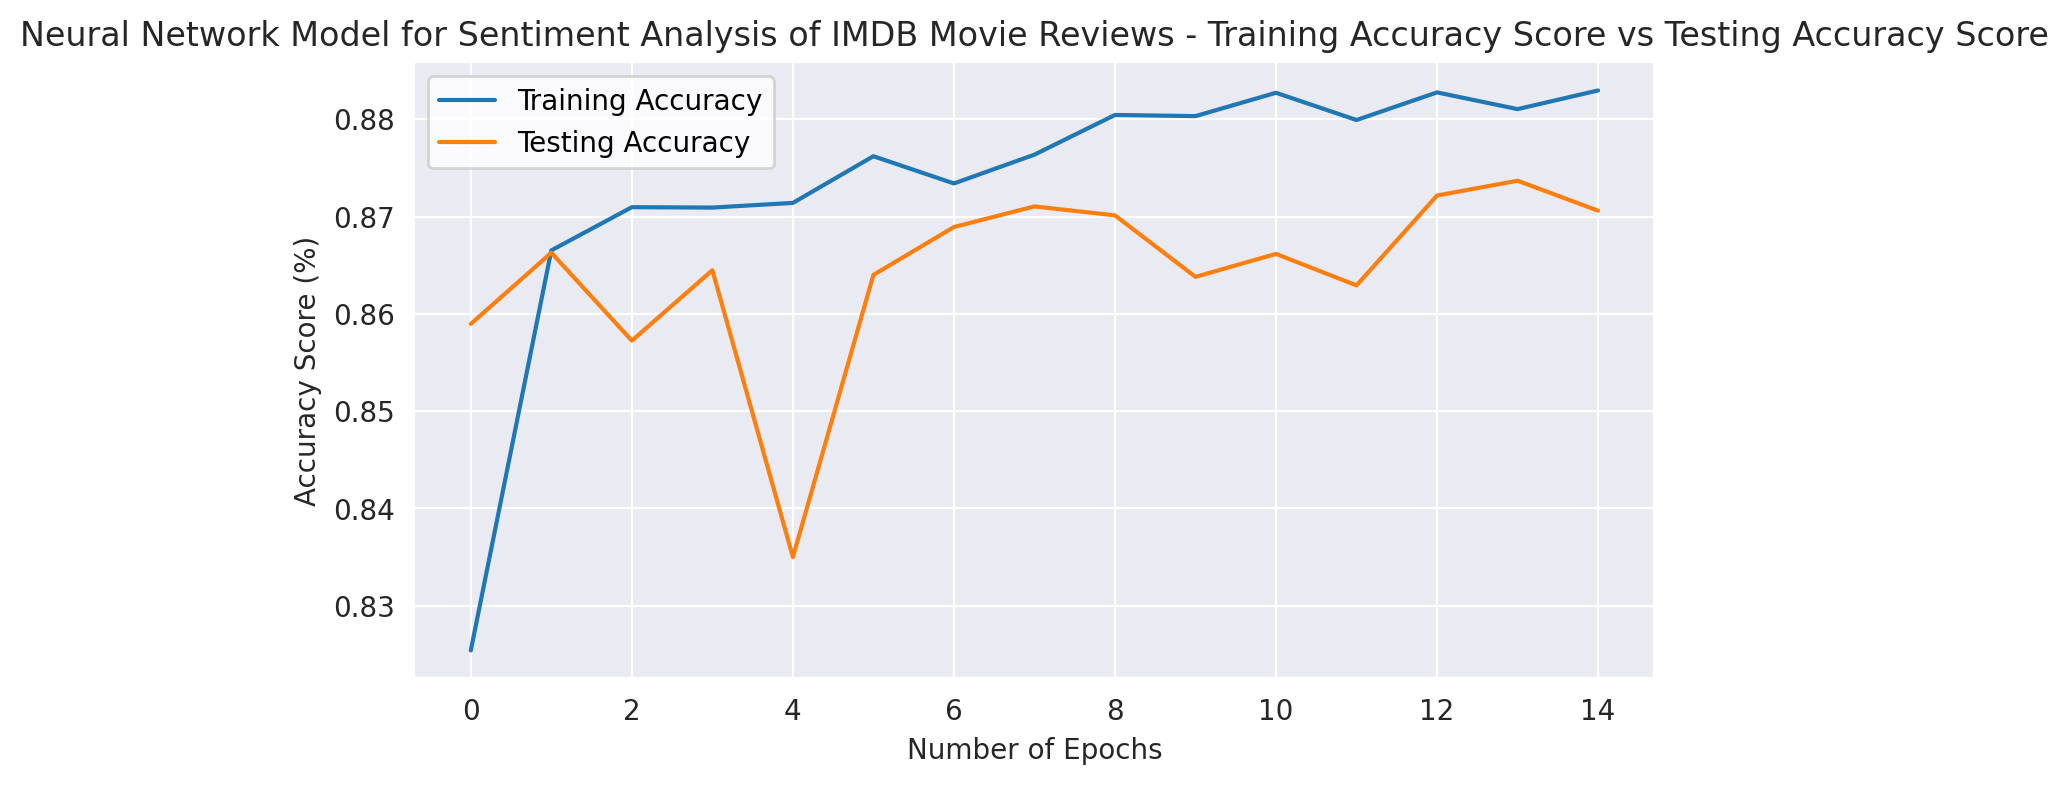

In [35]:
# Plot training accuracy vs testing accuracy of model
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'):
  ax1 = sns.lineplot(train_history.history['accuracy'], label='Training Accuracy')
  ax2 = sns.lineplot(train_history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Neural Network Model for Sentiment Analysis of IMDB Movie Reviews - Training Accuracy Score vs Testing Accuracy Score')
plt.xlabel('Number of Epochs') # x-axis label
plt.ylabel('Accuracy Score (%)') # y-axis label
plt.legend() # Add legend